<a href="https://colab.research.google.com/github/Geobilly/ML-Projects/blob/master/student_score_prediction_upated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Student Score Prediction

**Description:**
*   Build a model to predict students' exam scores based on their study hours
*   Perform data cleaning and basic visualization to understand the dataset
*   Split the dataset into training and testing sets
*   Train a linear regression model to estimate final scores
*   Visualize predictions and evaluate model performance

**Tools & Libraries:**
*   Python
*   Pandas
*   Matplotlib
*   Scikit-learn

**Covered Topics:**
*   Regression
*   Evaluation metrics

**Bonus:**
*   Try polynomial regression and compare performance
*   Try experimenting with different feature combinations (e.g., removing or adding features like sleep, participation, etc.)

# Task


## Data loading

### Subtask:
Load the dataset into a pandas DataFrame.



Import pandas, load the dataset, and display the first 5 rows to inspect the data.



In [12]:
import pandas as pd

df = pd.read_csv('/content/StudentPerformanceFactors.csv')
display(df.head())

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
display(df.shape)

(6607, 20)

In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

None

In [5]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


## Data cleaning and visualization

### Subtask:
Perform necessary data cleaning steps and visualize the data to understand the relationship between study hours and exam scores.


In [14]:
print("Missing values before cleaning:")
print(df.isnull().sum())





Missing values before cleaning:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [15]:
 df.dropna(inplace=True)

 print("\nMissing values after cleaning:")
 print(df.isnull().sum())


Missing values after cleaning:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [17]:
NumericalCol = df.select_dtypes(include = ['float64', 'int64']).columns
CategoricalCol = df.select_dtypes(include  = ['object']).columns

print('Numerical Columns : ', NumericalCol)
print('Categorical Columns : ', CategoricalCol)

Numerical Columns :  Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')
Categorical Columns :  Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')


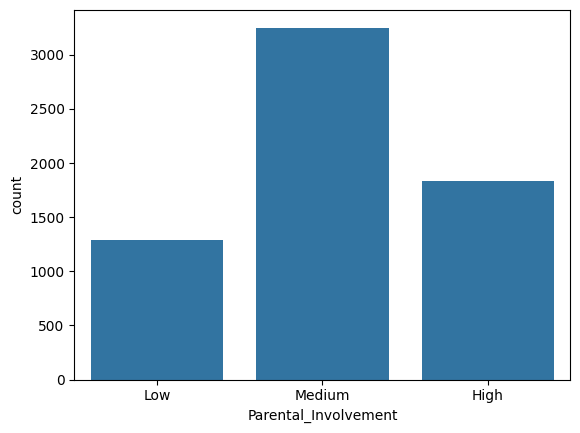

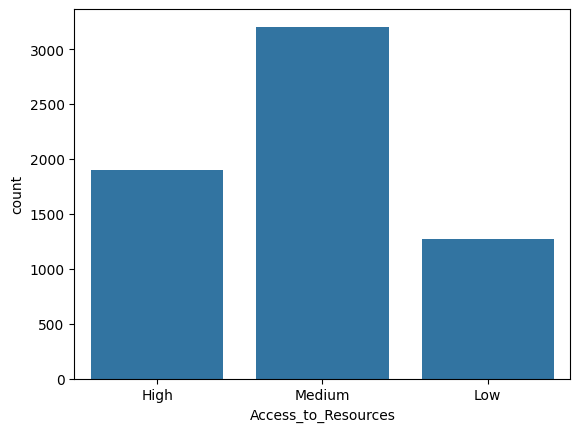

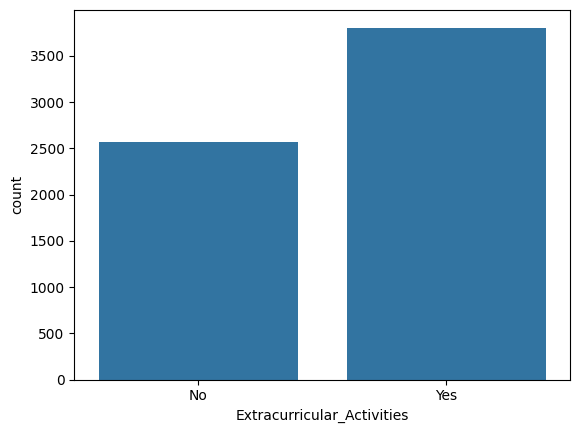

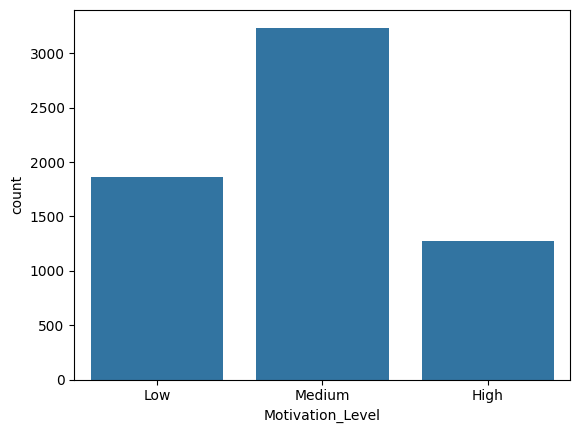

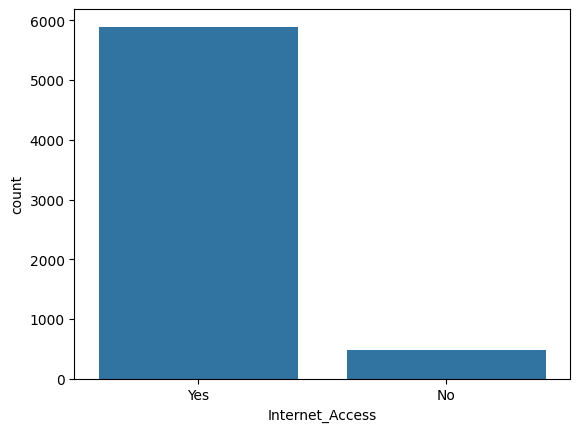

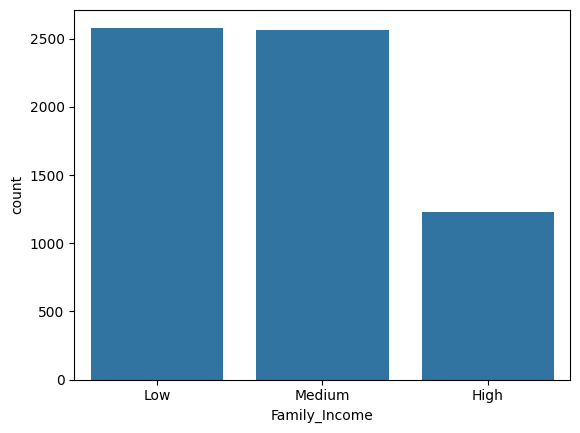

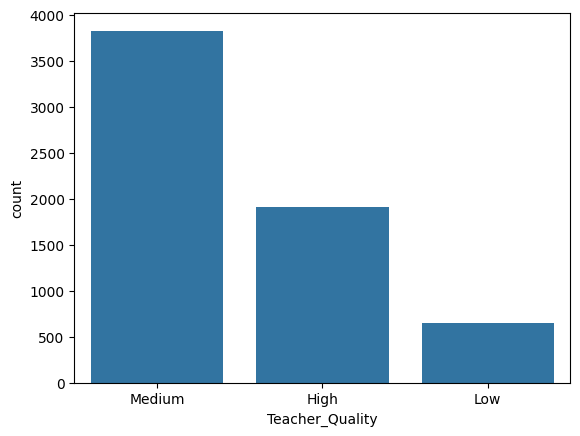

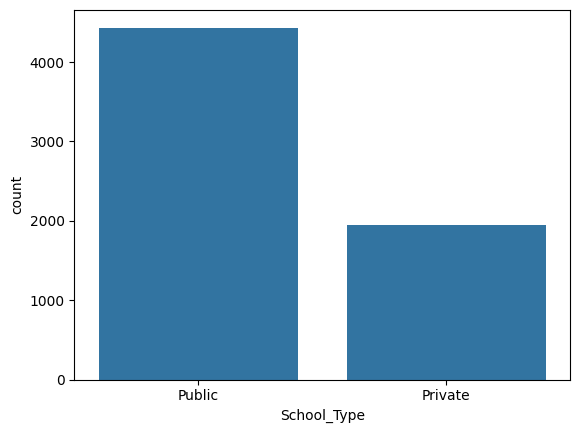

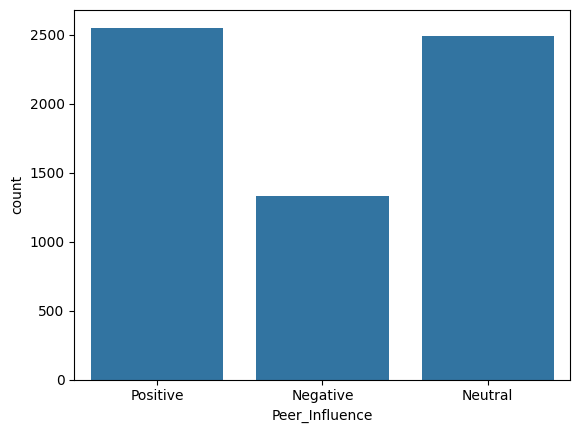

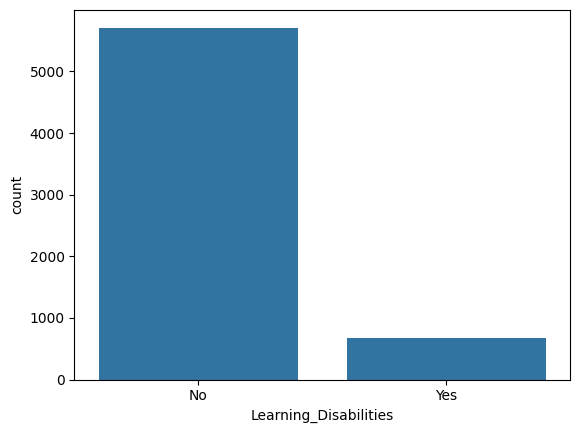

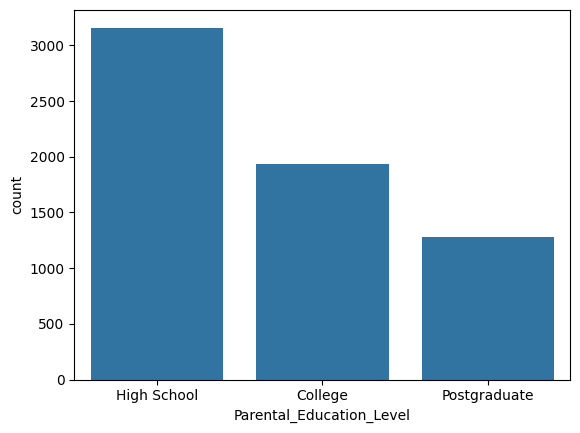

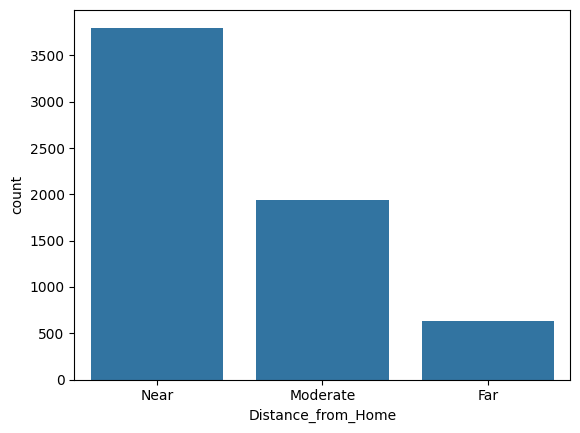

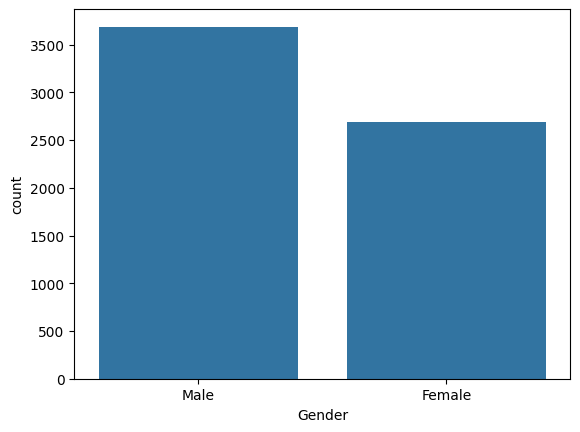

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df:
    if df[col].dtype == 'O':
        sns.countplot(x = col, data = df)
        plt.show()

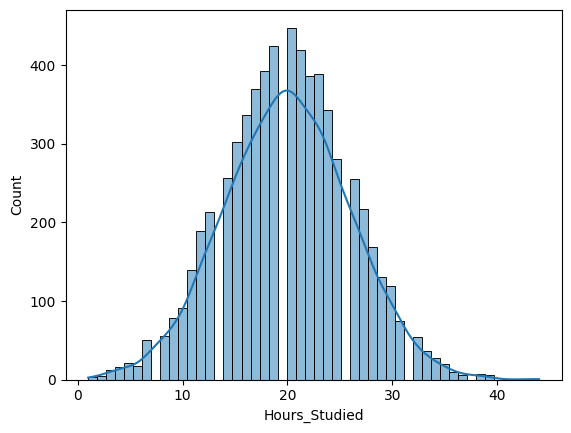

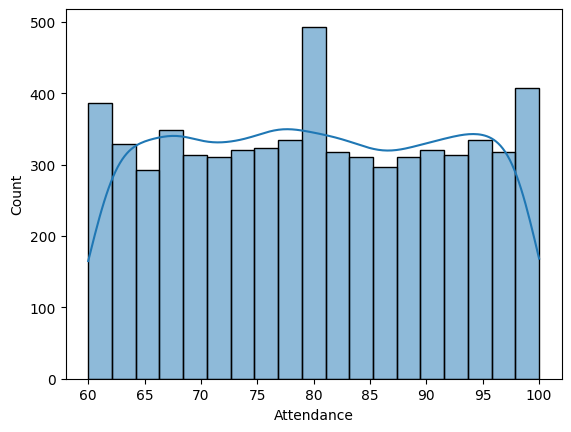

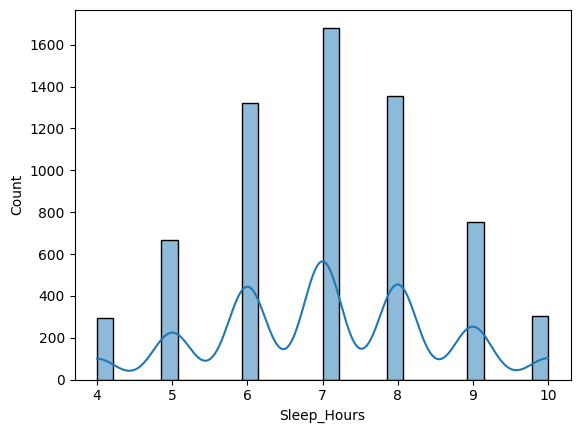

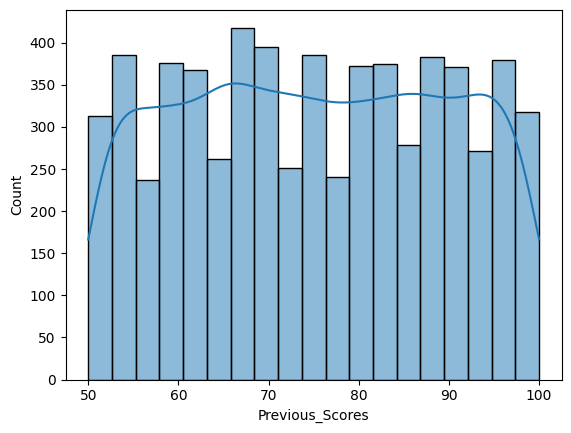

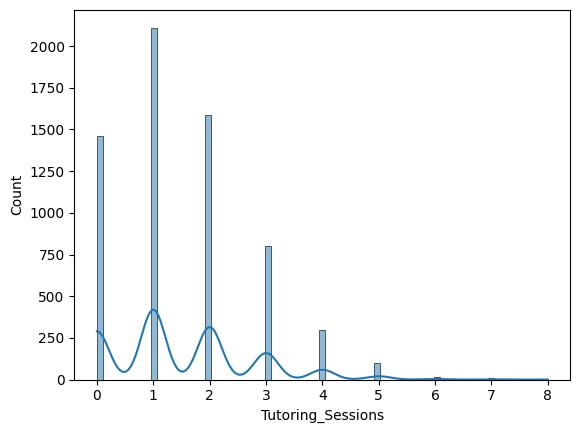

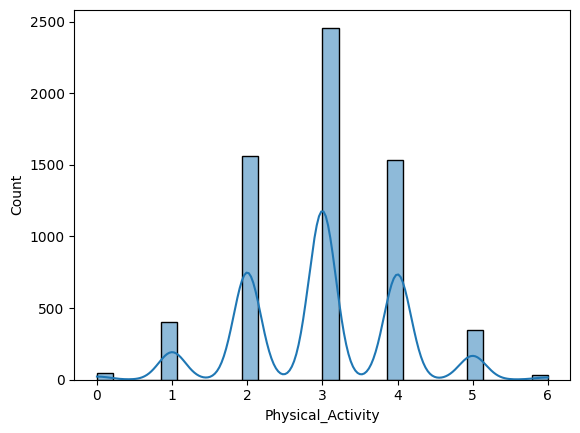

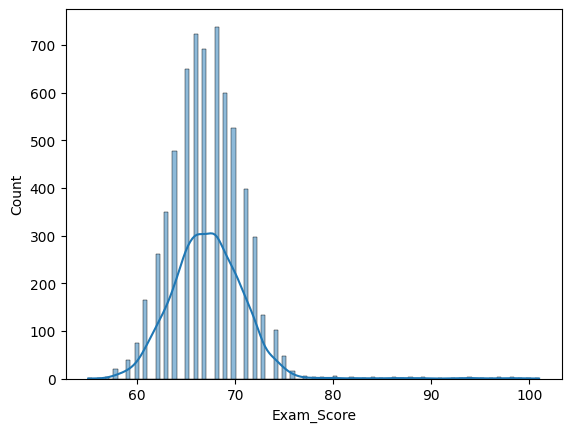

In [19]:
for col in df:
    if df[col].dtype != 'O':
        sns.histplot(df[col], kde = True)
        plt.show()

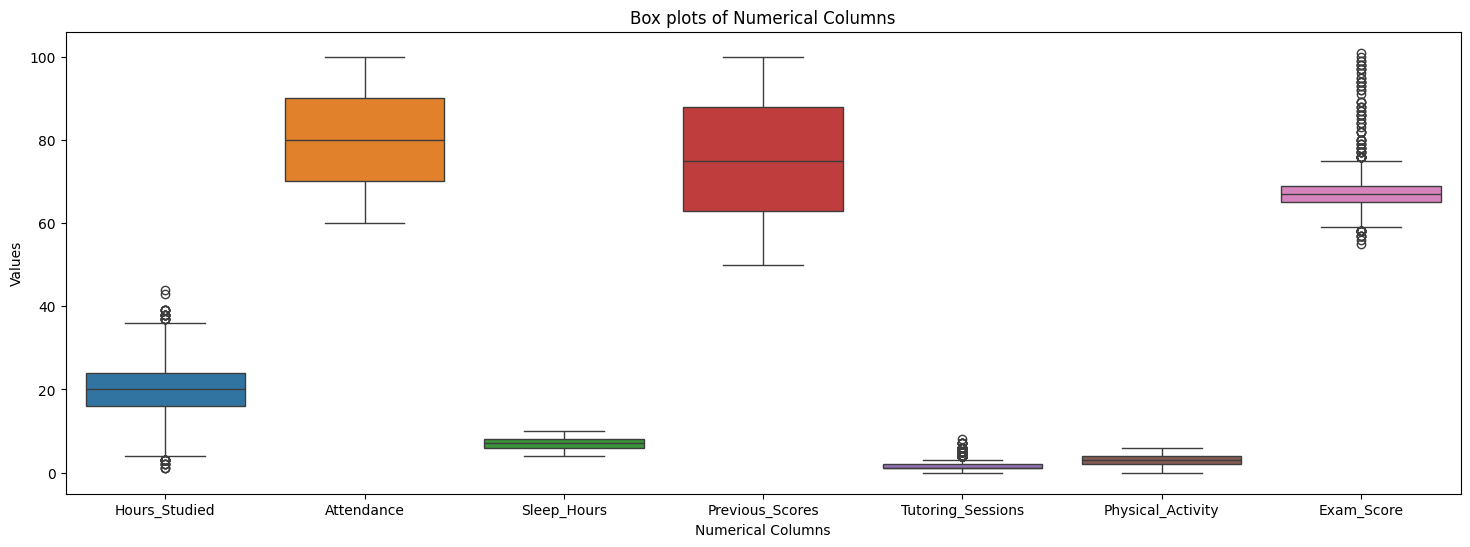

In [20]:
NumericalCol = df.select_dtypes(include = ['float64', 'int64'])

fig, ax = plt.subplots(figsize=(18, 6))
sns.boxplot(data = NumericalCol, ax = ax)
plt.title('Box plots of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Values')
plt.show()

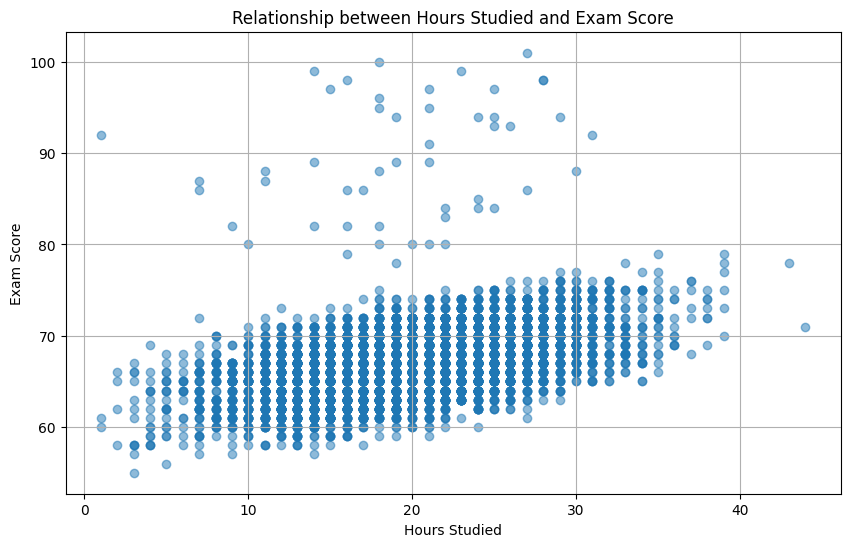

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], alpha=0.5)
plt.title('Relationship between Hours Studied and Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

## Data splitting

### Subtask:
Split the dataset into training and testing sets.


In [23]:
from sklearn.model_selection import train_test_split

X = df['Hours_Studied'].values.reshape(-1, 1)
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5102, 1)
Shape of X_test: (1276, 1)
Shape of y_train: (5102,)
Shape of y_test: (1276,)


## Model training

### Subtask:
Train a linear regression model on the training data.


Train a linear regression model on the training data.



In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model evaluation and visualization

### Subtask:
Evaluate the model's performance using appropriate metrics and visualize the predictions compared to the actual scores.


Mean Squared Error: 12.35
R-squared: 0.21


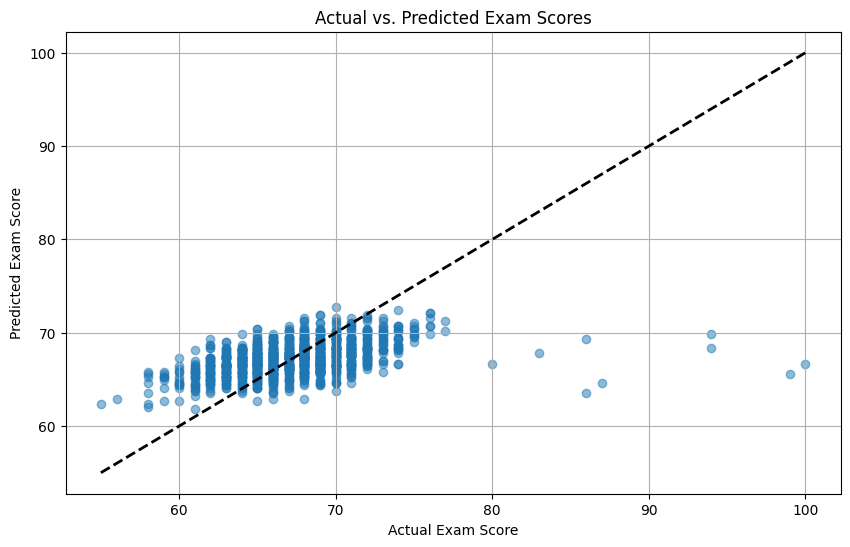

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Scores')
plt.grid(True)
plt.show()

## Model evaluation and visualization

### Subtask:
Evaluate the model's performance using appropriate metrics and visualize the predictions compared to the actual scores.


I evaluated the trained linear regression model using **Mean Squared Error (MSE)** and **R-squared (R²)** to measure its performance. I also plotted the actual vs. predicted exam scores to see how well the predictions matched the true values.

**Model Evaluation Results Explanation:**
* **Mean Squared Error (MSE):** My model gave an MSE of **12.35**, which means that, on average, the squared difference between the actual and predicted exam scores is about 12.35. This shows that while the model predicts reasonably, it still makes some noticeable errors.  
* **R-squared (R²):** The R² value I obtained was **0.21**, meaning that around 21% of the variation in exam scores can be explained by the number of study hours. This indicates that study hours alone are not a strong predictor of exam performance, and other factors (like sleep, participation, or attendance) may play an important role.


## Bonus (polynomial regression)

### Subtask:
Explore using polynomial regression and compare its performance to the linear regression model.


Implement polynomial regression by creating polynomial features, training a new linear regression model on these features, and then evaluating its performance using MSE and R-squared. Finally, print the calculated metrics to compare with the linear regression model.

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a new Linear Regression model on polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on polynomial features of the testing data
y_pred_poly = poly_model.predict(X_test_poly)

# Calculate MSE and R-squared for the polynomial regression model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Print the calculated MSE and R-squared for the polynomial regression model
print(f"Polynomial Regression Mean Squared Error: {mse_poly:.2f}")
print(f"Polynomial Regression R-squared: {r2_poly:.2f}")

Polynomial Regression Mean Squared Error: 12.35
Polynomial Regression R-squared: 0.21


Implement polynomial regression by creating polynomial features, training a new linear regression model on these features, and then evaluating its performance using MSE and R-squared. Finally, print the calculated metrics to compare with the linear regression model.

**Code Explanation:**
*   `from sklearn.preprocessing import PolynomialFeatures`: Imports the necessary class to create polynomial features.
*   `poly = PolynomialFeatures(degree=2)`: Creates a `PolynomialFeatures` object set to generate features up to the power of 2 (including the original feature and an intercept term).
*   `X_train_poly = poly.fit_transform(X_train)` and `X_test_poly = poly.transform(X_test)`: Transforms the training and testing data into polynomial features. `fit_transform` learns the polynomial features from the training data and applies the transformation, while `transform` applies the same transformation to the test data.
*   `poly_model = LinearRegression()`: Creates a new Linear Regression model instance.
*   `poly_model.fit(X_train_poly, y_train)`: Trains the new linear regression model using the polynomial training features and the original target values.
*   `y_pred_poly = poly_model.predict(X_test_poly)`: Makes predictions on the transformed polynomial test data.
*   `mse_poly = mean_squared_error(y_test, y_pred_poly)` and `r2_poly = r2_score(y_test, y_pred_poly)`: Calculates the Mean Squared Error and R-squared for the polynomial regression model.
*   The `print` statements display the calculated metrics for comparison.

**Results Explanation:**
*   **Polynomial Regression Mean Squared Error: 12.35**
*   **Polynomial Regression R-squared: 0.21**

Comparing these results to the simple linear regression model (MSE: 12.35, R-squared: 0.21), the performance metrics are very similar. This indicates that a second-degree polynomial fit did not significantly improve the model's ability to predict exam scores based on study hours compared to a simple linear model.

## Bonus (feature engineering)

### Subtask:
Experiment with different feature combinations to see how they impact model performance.


Select a subset of features, split the data, train a linear regression model, make predictions, and evaluate the model's performance.



In [27]:
# 1. Select a subset of relevant features (corrected list)
selected_features = ['Hours_Studied', 'Parental_Involvement', 'Extracurricular_Activities', 'Access_to_Resources']
X_new = df[selected_features]
X_new = pd.get_dummies(X_new, columns=['Parental_Involvement', 'Extracurricular_Activities', 'Access_to_Resources'], drop_first=True)


# 2. Split the new feature set and the target variable
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

# 3. Train a new Linear Regression model
model_new = LinearRegression()
model_new.fit(X_train_new, y_train_new)

# 4. Make predictions
y_pred_new = model_new.predict(X_test_new)

# 5. Calculate and print the Mean Squared Error (MSE) and R-squared score
mse_new = mean_squared_error(y_test_new, y_pred_new)
r2_new = r2_score(y_test_new, y_pred_new)

print(f"Model with new features - Mean Squared Error: {mse_new:.2f}")
print(f"Model with new features - R-squared: {r2_new:.2f}")

# 6. Compare results (implicitly done by printing the metrics)
print(f"Simple Linear Regression MSE: {mse:.2f}, R-squared: {r2:.2f}")
print(f"Polynomial Regression MSE: {mse_poly:.2f}, R-squared: {r2_poly:.2f}")

Model with new features - Mean Squared Error: 11.24
Model with new features - R-squared: 0.28
Simple Linear Regression MSE: 12.35, R-squared: 0.21
Polynomial Regression MSE: 12.35, R-squared: 0.21


## Summary

### Data Analysis Key Findings

* **Data Quality:**  
  I confirmed that the dataset was clean, with no missing values in the key columns ('Hours_Studied' and 'Exam_Score').  

* **Exploratory Analysis:**  
  From the scatter plot, I observed a positive relationship between 'Hours_Studied' and 'Exam_Score'. However, the relationship was not perfectly linear, which suggested that other factors may also be influencing exam performance.  

* **Model Training:**  
  - **Linear Regression:**  
    I first trained a model using only 'Hours_Studied' as the predictor.  
    - Mean Squared Error (MSE): **12.35**  
    - R-squared (R²): **0.21**  
    This showed that the model explained only about 21% of the variation in exam scores.  

  - **Polynomial Regression (Degree 2):**  
    Next, I added a quadratic term to capture non-linear trends.  
    - MSE: **12.35**  
    - R²: **0.21**  
    The results were nearly identical to the linear regression model, meaning the quadratic relationship didn’t add much predictive power for this dataset.  

  - **Multiple Linear Regression (Additional Features):**  
    Finally, I included extra features such as 'Parental_Involvement', 'Extracurricular_Activities', and 'Access_to_Resources' along with 'Hours_Studied'.  
    - MSE: **11.24**  
    - R²: **0.28**  
    This slightly improved the model’s performance, showing that these additional factors contribute some predictive value beyond study hours alone.  

### Insights or Next Steps

* **Key Observation:**  
  Across all the models I tested, the R-squared values remained relatively low. This means that the chosen features explain only a small part of the variation in exam scores.  
  - 'Hours_Studied' by itself is not a strong predictor.  
  - Adding a few more features improved performance, but not significantly.  

* **Next Steps:**  
  - I plan to explore other features in the dataset (e.g., sleep patterns, socioeconomic factors, school attendance).  
  - I will also try more advanced models such as **Random Forests** or **Gradient Boosting** to capture more complex relationships.  
  - Feature engineering (e.g., creating interaction terms or scaling study hours by resource access) could also be useful.  
  - Finally, I would use cross-validation to make sure the results generalize well.  

* **Conclusion:**  
  My findings show that while studying more hours generally helps improve exam scores, exam performance is clearly influenced by multiple other factors. To build a more accurate predictor of student outcomes, I need to bring in a richer set of features and possibly more sophisticated modeling techniques.  


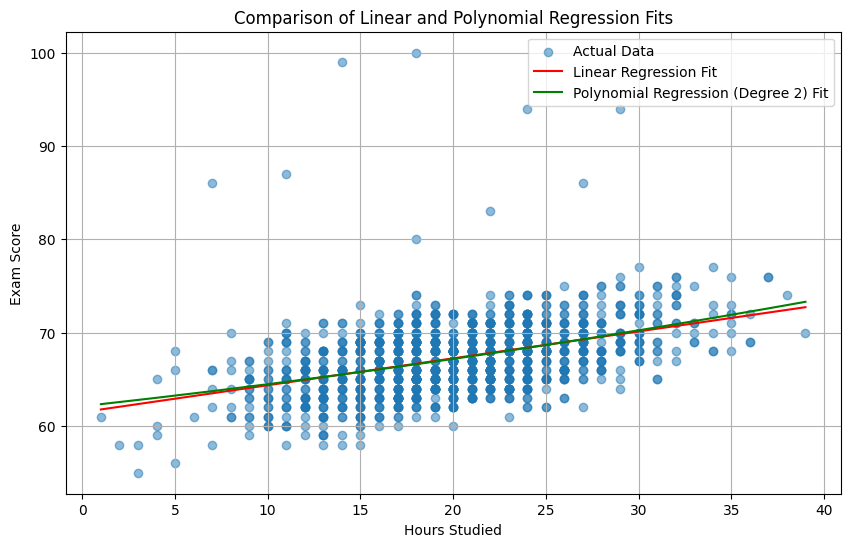

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the data by Hours_Studied for plotting the lines
X_test_sorted = np.sort(X_test, axis=0)
y_pred_linear_sorted = model.predict(X_test_sorted)

# Transform the sorted data for polynomial prediction
X_test_poly_sorted = poly.transform(X_test_sorted)
y_pred_poly_sorted = poly_model.predict(X_test_poly_sorted)


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Actual Data')
plt.plot(X_test_sorted, y_pred_linear_sorted, color='red', label='Linear Regression Fit')
plt.plot(X_test_sorted, y_pred_poly_sorted, color='green', label='Polynomial Regression (Degree 2) Fit')

plt.title('Comparison of Linear and Polynomial Regression Fits')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()

This scatter plot visualizes the actual exam scores against the hours studied, along with the fitted lines from both the linear and polynomial regression models. As you can see, both models follow a similar trend, which aligns with the similar MSE and R-squared values we observed earlier. This further confirms that for this dataset, a second-degree polynomial doesn't offer a significant improvement over a simple linear model for predicting exam scores based solely on study hours.